# Data Aggregation and Group Operations

In [95]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [96]:
pd.options.display.notebook_repr_html = False

In [97]:
%matplotlib inline

## GroupBy mechanics

In [98]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [99]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [100]:
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [101]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [102]:
means.unstack()

key2       one       two
key1                    
a     0.880536  0.478943
b    -0.519439 -0.555730

In [103]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.478943
            2006   -0.519439
Ohio        2005   -0.380219
            2006    1.965781
Name: data1, dtype: float64

In [104]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [105]:
df.groupby(['key1', 'key2']).mean()

              data1     data2
key1 key2                    
a    one   0.880536  1.319920
     two   0.478943  0.092908
b    one  -0.519439  0.281746
     two  -0.555730  0.769023

In [106]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating over groups

In [107]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [108]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
('a', 'two')
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
('b', 'two')
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [109]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two

In [110]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [111]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.204708  1.393406
 1  0.478943  0.092908
 2 -0.519439  0.281746
 3 -0.555730  0.769023
 4  1.965781  1.246435, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a column or subset of columns

In [112]:
df.groupby(['key1', 'key2'])[['data2']].mean()

              data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023

In [113]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [114]:
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### Grouping with dicts and Series

In [115]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

C:\Users\chzo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [116]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [117]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

            blue       red
Joe     0.503905  1.063885
Steve   1.297183 -1.553778
Wes    -1.021228 -1.116829
Jim     0.524712  1.770545
Travis -4.230992 -2.405455

In [118]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [119]:
people.groupby(map_series, axis=1).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

### Grouping with functions

In [120]:
people.groupby(len).sum()

          a         b         c         d         e
3  0.591569 -0.993608  0.798764 -0.791374  2.119639
5  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [121]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

              a         b         c         d         e
3 one -0.539741 -1.296221  0.274992 -1.021228 -0.577087
  two  0.124121  0.302614  0.523772  0.000940  1.343810
5 one  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 two -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

### Grouping by index levels

In [122]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.560145 -1.265934  0.119827 -1.063512  0.332883
1     -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
2      0.286350  0.377984 -0.753887  0.331286  1.349742
3      0.069877  0.246674 -0.011862  1.004812  1.327195

In [123]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation

In [124]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [125]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [126]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

         data1     data2
key1                    
a     2.170488  1.300498
b     0.036292  0.487276

In [127]:
grouped.describe()

     data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.746672  1.109736 -0.204708  0.137118  0.478943  1.222362   
b      2.0 -0.537585  0.025662 -0.555730 -0.546657 -0.537585 -0.528512   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.965781   3.0  0.910916  0.712217  0.092908  0.669671  1.246435   
b    -0.519439   2.0  0.525384  0.344556  0.281746  0.403565  0.525384   

                          
           75%       max  
key1                      
a     1.319920  1.393406  
b     0.647203  0.769023  

In [128]:
tips = pd.read_csv('ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

FileNotFoundError: File b'ch08/tips.csv' does not exist

### Column-wise and multiple function application

In [130]:
grouped = tips.groupby(['sex', 'smoker'])

NameError: name 'tips' is not defined

In [131]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

KeyError: 'Column not found: tip_pct'

In [132]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

NameError: name 'grouped_pct' is not defined

In [133]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

NameError: name 'grouped_pct' is not defined

In [134]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

KeyError: "Columns not found: 'tip_pct', 'total_bill'"

In [135]:
result['tip_pct']

NameError: name 'result' is not defined

In [136]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

KeyError: "Columns not found: 'tip_pct', 'total_bill'"

In [137]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

C:\Users\chzo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


KeyError: 'tip'

In [ ]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Returning aggregated data in "unindexed" form

In [138]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

NameError: name 'tips' is not defined

## Group-wise operations and transformations

In [139]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [140]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

      mean_data1  mean_data2
key1                        
a       0.746672    0.910916
b      -0.537585    0.525384

In [141]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

      data1     data2 key1 key2  mean_data1  mean_data2
0 -0.204708  1.393406    a  one    0.746672    0.910916
1  0.478943  0.092908    a  two    0.746672    0.910916
4  1.965781  1.246435    a  one    0.746672    0.910916
2 -0.519439  0.281746    b  one   -0.537585    0.525384
3 -0.555730  0.769023    b  two   -0.537585    0.525384

In [142]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

            a         b         c         d         e
one -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
two  0.505275 -0.849512  0.075965  0.834983  0.452620

In [ ]:
people.groupby(key).transform(np.mean)

In [ ]:
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

In [ ]:
demeaned.groupby(key).mean()

### Apply: General split-apply-combine

In [ ]:
def top(df, n=5, column='tip_pct'):
    return df.sort_index(by=column)[-n:]
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

In [ ]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

In [ ]:
result.unstack('smoker')

#### Suppressing the group keys

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

### Quantile and bucket analysis

In [ ]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Example: Filling missing values with group-specific values

In [ ]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

In [ ]:
s.fillna(s.mean())

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

In [ ]:
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

### Example: Random sampling and permutation

In [ ]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)

In [ ]:
base_names

In [ ]:
deck[:13]

In [ ]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
# alternatively
temp = deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Example: Group weighted average and correlation

In [ ]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

In [ ]:
close_px[:4]

In [ ]:
close_px.pct_change().dropna().head(5)

In [ ]:
close_px.pct_change().head(5)

In [ ]:
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

In [ ]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Example: Group-wise linear regression

In [ ]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## Pivot tables and Cross-tabulation

In [ ]:
tips.pivot_table(index=['sex', 'smoker'])

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

In [ ]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

### Cross-tabulations: crosstab

In [ ]:
from StringIO import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## Example: 2012 Federal Election Commission Database

In [185]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')`b

SyntaxError: invalid syntax (<ipython-input-185-c19f9f4f7779>, line 1)

In [186]:
fec.head(5)

     cmte_id    cand_id             cand_nm           contbr_nm  \
0  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
1  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
2  C00410118  P20002978  Bachmann, Michelle       SMITH, LANIER   
3  C00410118  P20002978  Bachmann, Michelle    BLEVINS, DARONDA   
4  C00410118  P20002978  Bachmann, Michelle  WARDENBURG, HAROLD   

          contbr_city contbr_st   contbr_zip contbr_employer  \
0              MOBILE        AL   3.6601e+08         RETIRED   
1              MOBILE        AL   3.6601e+08         RETIRED   
2              LANETT        AL  3.68633e+08    NOT PROVIDED   
3             PIGGOTT        AR  7.24548e+08            NONE   
4  HOT SPRINGS NATION        AR  7.19016e+08            NONE   

  contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc memo_cd  \
0           RETIRED              250.0        20-JUN-11          NaN     NaN   
1           RETIRED               50.0        23-JUN

In [187]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 17 columns):
cmte_id              991475 non-null object
cand_id              991475 non-null object
cand_nm              991475 non-null object
contbr_nm            991475 non-null object
contbr_city          991457 non-null object
contbr_st            991471 non-null object
contbr_zip           991373 non-null object
contbr_employer      983833 non-null object
contbr_occupation    989133 non-null object
contb_receipt_amt    991475 non-null float64
contb_receipt_dt     991475 non-null object
receipt_desc         5219 non-null object
memo_cd              89461 non-null object
memo_text            94274 non-null object
form_tp              991475 non-null object
file_num             991475 non-null int64
party                991475 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 136.2+ MB


In [188]:
fec.loc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
party                                Democrat
Name: 123456, dtype: object

In [189]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [190]:
unique_cands[2]

'Obama, Barack'

In [191]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [192]:
fec.cand_nm[123456:123461]

125611    Obama, Barack
125612    Obama, Barack
125613    Obama, Barack
125614    Obama, Barack
125615    Obama, Barack
Name: cand_nm, dtype: object

In [193]:
fec.cand_nm[123456:123461].map(parties)

125611    Democrat
125612    Democrat
125613    Democrat
125614    Democrat
125615    Democrat
Name: cand_nm, dtype: object

In [194]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [195]:
fec['party'].value_counts()

Democrat      589127
Republican    402348
Name: party, dtype: int64

In [196]:
(fec.contb_receipt_amt > 0).value_counts()

True    991475
Name: contb_receipt_amt, dtype: int64

In [197]:
fec = fec[fec.contb_receipt_amt > 0]

In [198]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo.head(5)

       cmte_id    cand_id       cand_nm           contbr_nm contbr_city  \
411  C00431171  P80003353  Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
412  C00431171  P80003353  Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
413  C00431171  P80003353  Romney, Mitt    CARLSEN, RICHARD         APO   
414  C00431171  P80003353  Romney, Mitt      DELUCA, PIERRE         APO   
415  C00431171  P80003353  Romney, Mitt    SARGENT, MICHAEL         APO   

    contbr_st   contbr_zip                   contbr_employer  \
411        AA   3.4023e+08                     US GOVERNMENT   
412        AA   3.4023e+08                     US GOVERNMENT   
413        AE    9.128e+07       DEFENSE INTELLIGENCE AGENCY   
414        AE    9.128e+07                             CISCO   
415        AE  9.01201e+07  RAYTHEON TECHNICAL SERVICES CORP   

             contbr_occupation  contb_receipt_amt contb_receipt_dt  \
411    FOREIGN SERVICE OFFICER               25.0        01-FEB-12   
412    FOREIGN SERVICE O

### Donation statistics by occupation and employer

In [199]:
fec.contbr_occupation.value_counts()[:10]

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [200]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [201]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [202]:
fec.head(5)

     cmte_id    cand_id             cand_nm           contbr_nm  \
0  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
1  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
2  C00410118  P20002978  Bachmann, Michelle       SMITH, LANIER   
3  C00410118  P20002978  Bachmann, Michelle    BLEVINS, DARONDA   
4  C00410118  P20002978  Bachmann, Michelle  WARDENBURG, HAROLD   

          contbr_city contbr_st   contbr_zip contbr_employer  \
0              MOBILE        AL   3.6601e+08         RETIRED   
1              MOBILE        AL   3.6601e+08         RETIRED   
2              LANETT        AL  3.68633e+08    NOT PROVIDED   
3             PIGGOTT        AR  7.24548e+08            NONE   
4  HOT SPRINGS NATION        AR  7.19016e+08            NONE   

  contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc memo_cd  \
0           RETIRED              250.0        20-JUN-11          NaN     NaN   
1           RETIRED               50.0        23-JUN

In [203]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [204]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party                 Democrat    Republican
contbr_occupation                           
ATTORNEY           11141982.97  7.477194e+06
CEO                 2074974.79  4.211041e+06
CONSULTANT          2459912.71  2.544725e+06
ENGINEER             951525.55  1.818374e+06
EXECUTIVE           1355161.05  4.138850e+06
HOMEMAKER           4248875.80  1.363428e+07
INVESTOR             884133.00  2.431769e+06
LAWYER              3160478.87  3.912243e+05
MANAGER              762883.22  1.444532e+06
NOT PROVIDED        4866973.96  2.056547e+07
OWNER               1001567.36  2.408287e+06
PHYSICIAN           3735124.94  3.594320e+06
PRESIDENT           1878509.95  4.720924e+06
PROFESSOR           2165071.08  2.967027e+05
REAL ESTATE          528902.09  1.625902e+06
RETIRED            25305116.38  2.356124e+07
SELF-EMPLOYED        672393.40  1.640253e+06

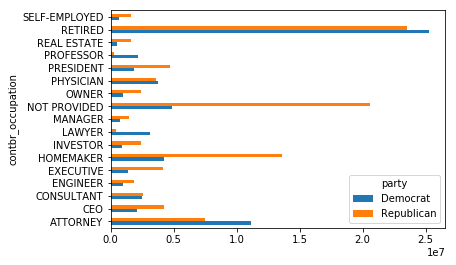

In [205]:
over_2mm.plot(kind='barh')

In [206]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    return totals.sort_values(ascending=False)[-n:]

In [207]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               SR MGR                                    3.0
               LEAD UI/UX DEVELOPER                      3.0
               POLICY/ LAWYER                            3.0
               LAN/WAN ANALYST                           3.0
               COMPUTER ASSISTANT                        3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
Romney, Mitt   DIRECTOR REISCHAUER CENTER FOR EAST A     5.0
               CHICKEN GRADER                            5.0
               IFC CONTRACTING SOLUTIONS                 3.0
               INDEPENDENT PROFESSIONAL                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               REMODELER & SEMI RETIRED                  3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

In [208]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                
Obama, Barack  SME CO, INC.                       3.0
               CADUCEUS OCCUPATIONAL MEDICINE     3.0
               SOLIYA                             3.0
               COPS TRUST                         3.0
               CARR ENTERPRISES                   3.0
               N.A.                               3.0
               REAL ENERGY CONSULTING SERVICES    3.0
               CASS REGIONAL MED. CENTER          2.5
               THE VICTORIA GROUP, INC.           2.0
               ARCON CORP                         2.0
Romney, Mitt   SCOTT GREENBAUM                    5.0
               RST GLOBAL LICENSING LLC           5.0
               MORGAN STANLEY SMITH BARNEY LLC    5.0
               LOUGH INVESTMENT ADVISORY LLC      4.0
               HONOLD COMMUNICTAIONS              3.0
               WILL MERRIFIELD                    3.0
               UN                                 3.0
               UPTOWN CHEAPSKATE   

### Bucketing donation amounts

In [209]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [214]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                       493.0          77.0
(1, 10]                    40070.0        3681.0
(10, 100]                 372280.0       31853.0
(100, 1000]               153991.0       43357.0
(1000, 10000]              22284.0       26186.0
(10000, 100000]                2.0           1.0
(100000, 1000000]              3.0           NaN
(1000000, 10000000]            4.0           NaN

In [215]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08           NaN
(1000000, 10000000]     7148839.76           NaN

In [218]:
bucket_sums.sum(axis=1)

contb_receipt_amt
(0, 1]                 3.952400e+02
(1, 10]                3.670873e+05
(10, 100]              2.227677e+07
(100, 1000]            7.716191e+07
(1000, 10000]          1.156959e+08
(10000, 100000]        7.180000e+04
(100000, 1000000]      1.490683e+06
(1000000, 10000000]    7.148840e+06
dtype: float64

In [181]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000           NaN
(1000000, 10000000]       1.000000           NaN

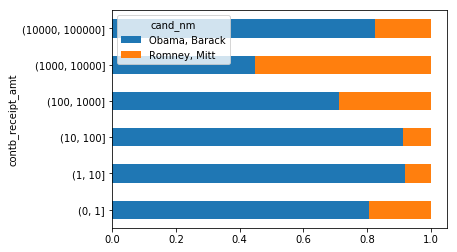

In [182]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### Donation statistics by state

In [183]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

In [184]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583